# Coding for Economists - Advanced Session 3

## 1. Setup Environment

In [1]:
%conda install nltk transformers gensim -y

Channels:
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: | 

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
%conda install pandas nltk 

Channels:
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: / 

## Package Plan ##

  environment location: /opt/anaconda3/envs/pyenv02

  added / updated specs:
    - nltk
    - pandas
    - pyarrow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arrow-cpp-19.0.0           |       h0b7d223_2         8.3 MB
    click-8.1.8                |  py312hca03da5_0         325 KB
    libabseil-20250127.0       | cxx17_h313beb8_0         1.2 MB
    libcurl-8.12.1             |       hde089ae_0         416 KB
    libgrpc-1.71.0             |       h62f6fdd_0         6.0 MB
    libopenblas-0.3.29         |       hea593b9_0        10.1 MB
    libprotobuf-5.29.3         |       h9f9f828_0         2.8 MB
    libre2-11-2024.07.02       |       h313beb8_0         185 KB
    numpy-2.0.1                |  py312h7f4fdc5_1          12 KB
    numpy-base-2.0

In [3]:
%pip install pyarrow bertopic sentence-transformers

  Using cached bertopic-0.17.0-py3-none-any.whl.metadata (23 kB)
  Using cached sentence_transformers-4.1.0-py3-none-any.whl.metadata (13 kB)
  Using cached hdbscan-0.8.40-cp312-cp312-macosx_10_13_universal2.whl.metadata (15 kB)
  Using cached umap_learn-0.5.7-py3-none-any.whl.metadata (21 kB)
  Using cached huggingface_hub-0.31.2-py3-none-any.whl.metadata (13 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached safetensors-0.5.3-cp38-abi3-macosx_11_0_arm64.whl.metadata (3.8 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
  Using cached llvmlite-0.44.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (4.8 kB)
Using cached bertopic-0.17.0-py3-none-any.whl (150 kB)
Using cached sentence_transformers-4.1.0-py3-none-any.whl (345 kB)
   ━━━━━━━━━━━━━━

In [8]:
%pip install tf-keras bertopic sentence-transformers pyarrow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import re

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Turn on copy on write
pd.options.mode.copy_on_write = True

## 2. Load Data

In [3]:
# import re

# def split_content(row):
#     content = row['Content']
#     title   = row['Title']
#     tag     = row['Tag']
#     # 1. Strip off the title prefix
#     temp = content[len(title):] if content.startswith(title) else content
#     # 2. Locate the tag and split
#     idx = temp.lower().find(tag.lower())
#     if idx != -1:
#         country = temp[:idx].strip()
#         body    = temp[idx + len(tag):].strip()
#     else:
#         country, body = '', temp.strip()
#     return pd.Series({'Country': country, 'Body': body})

# # Apply to your DataFrame
# df[['Country','Body']] = df.apply(split_content, axis=1)

# # Drop the old 'Content' column
# df = df.drop(columns=['Content'])

# # Rename 'Body' to 'Content'
# df = df.rename(columns={'Body': 'Content'})

# df.set_index('Title', inplace=True)

# df.to_csv('Financial_df.csv')

In [2]:
df = pd.read_csv('Financial_df.csv')
df.head()

,Title,Tag,Country,Content
0,"TSX Slightly Down, Books Weekly Gains",Stock Market,United States,The S&P/TSX Composite index ended marginally i...
1,UnitedHealth Hits 4-week High,stocks,United States,UnitedHealth increased to a 4-week high of 483...
2,Cisco Systems Hits 4-week Low,stocks,United States,Cisco Systems decreased to a 4-week low of 50....
3,AT&T Hits All-time Low,stocks,United States,AT&T decreased to an all-time low of 14.393 da...
4,Microsoft Hits 4-week High,stocks,United States,Microsoft increased to a 4-week high of 348.56...


## 3. Noise Removal

In [5]:
df.Content[0]

'The S&P/TSX Composite index ended marginally in the red at the 20,260 level on Friday, the highest since late May, snapping the sharp gains from the prior three sessions while adding 2.2% on the week amid continuous hopes that lower inflation will ease central banks’ prolonged tightening pressure. Energy producers led the losses of the session and slipped 2.3%, tracking lower oil prices. Also, policy-sensitive tech shares edged down by 0.2%, tracking their peers on Nasdaq. On the other hand, the heavyweight financial sector gained 0.3% following some upbeat corporate results for US banking giants. Among stocks, TELUS International tumbled 30.5% after the IT services company estimated a loss for the second quarter results. Pine Cliff Energy fell 6.9% after being downgraded by Stifel. Also, First Quantum Minerals slipped 0.7% after Raymond James downgraded the rating on copper miner. 2 days ago'

In [6]:
df.Content[400]

'US crude oil inventories rose by 5.04 million barrels in the week ending May 12, 2023, the biggest weekly increase in 12 weeks, compared with market expectations of a 0.92 million drop, data from the EIA Petroleum Status Report showed. Also, crude stocks at the Cushing, Oklahoma delivery hub were up by 1.461 million barrels, the most since end-January and following a 397 thousand rise in the previous period. On the other hand, gasoline inventories fell by 1.381 million, more than forecasts of a 1.06 million draw; and distillate stockpiles, which include diesel and heating oil, were up by 0.08 million barrels, above the consensus for a 0.057 million rise.\n2023-05-17T14:41:00'

- __Remove Trailing Time Indicators__

In [3]:
# define the regex for trailing time indicators
time_pattern = r'\s*\d+\s+(?:second|minute|hour|day|week)s?\s+ago$'
iso_pattern = r'\s*\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}$'

# apply to the Content column
df['Content'] = (
    df['Content']
      .str.replace(time_pattern, '', regex=True)  # drop the trailing “X ago”
      .str.replace(iso_pattern, '', regex=True)  # drop the trailing “2023-05-17T12:35:00”
      .str.replace(r'\n', ' ', regex=True)       # replace newline '\n' to space
      .str.replace(r'\s+', ' ',     regex=True)  # collapse multi-space
      .str.strip()                                # remove any leftover whitespace
)

In [8]:
df.Content[0]

'The S&P/TSX Composite index ended marginally in the red at the 20,260 level on Friday, the highest since late May, snapping the sharp gains from the prior three sessions while adding 2.2% on the week amid continuous hopes that lower inflation will ease central banks’ prolonged tightening pressure. Energy producers led the losses of the session and slipped 2.3%, tracking lower oil prices. Also, policy-sensitive tech shares edged down by 0.2%, tracking their peers on Nasdaq. On the other hand, the heavyweight financial sector gained 0.3% following some upbeat corporate results for US banking giants. Among stocks, TELUS International tumbled 30.5% after the IT services company estimated a loss for the second quarter results. Pine Cliff Energy fell 6.9% after being downgraded by Stifel. Also, First Quantum Minerals slipped 0.7% after Raymond James downgraded the rating on copper miner.'

In [9]:
df.Content[400]

'US crude oil inventories rose by 5.04 million barrels in the week ending May 12, 2023, the biggest weekly increase in 12 weeks, compared with market expectations of a 0.92 million drop, data from the EIA Petroleum Status Report showed. Also, crude stocks at the Cushing, Oklahoma delivery hub were up by 1.461 million barrels, the most since end-January and following a 397 thousand rise in the previous period. On the other hand, gasoline inventories fell by 1.381 million, more than forecasts of a 1.06 million draw; and distillate stockpiles, which include diesel and heating oil, were up by 0.08 million barrels, above the consensus for a 0.057 million rise.'

- __Remove URLs, Email $ Social Handles__

In [4]:
def remove_ref(text):
    # Drop URLs, emails, handles
    text = re.sub(r"https?://\S+|www\.\S+", "", text)            # URLs
    text = re.sub(r"\S+@\S+\.\S+", "", text)                     # Emails
    text = re.sub(r"@\w+", "", text)                             # Twitter handles
    return text

df['Content'] = df['Content'].apply(remove_ref)

- __Remove Non-text Characters__

In [5]:
def remove_special_chars(text):
    # Remove control characters (e.g. Horizontal Tab \x09, Escape \x1B)
    text = re.sub(r'[\x00-\x1F\x7F]', '', text)
    # Remove non-BMP characters (e.g., emojis)
    text = re.sub(r'[\U00010000-\U0010FFFF]', '', text)
    # (Optional) Re-encode to UTF-8 & ignore any problematic bytes
    text = text.encode('utf-8', 'ignore').decode('utf-8', 'ignore')
    return text

# Apply to the Content column
df['Content'] = df['Content'].apply(remove_special_chars)

## 3. Classic Text Preprocessing

### 3.1 Tokenize Text
Sentence -> List of Words

In [12]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jiancao/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [62]:
content_tokenized = [word_tokenize(x) for x in df['Content']]
content_tokenized[400][:20]

['US',
 'crude',
 'oil',
 'inventories',
 'rose',
 'by',
 '5.04',
 'million',
 'barrels',
 'in',
 'the',
 'week',
 'ending',
 'May',
 '12',
 ',',
 '2023',
 ',',
 'the',
 'biggest']

### 3.2 Filter Stop Words
- Articles: A, an, the
- Conjunctions: And, but, or
- Prepositions: In, on, at, with
- Pronouns: He, she, it, they
- Common verbs: Is, am, are, was, were, be, being, been

In [14]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiancao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
# Grab the English stop-words set
stop_words = set(stopwords.words('english'))

# Filter out any token that (when lowercased) is in the stop-list
content_token_stop = [
    [token for token in token_list if token.isalpha() and token.lower() not in stop_words]
    for token_list in content_tokenized
]
content_token_stop[400][:20]

['US',
 'crude',
 'oil',
 'inventories',
 'rose',
 'million',
 'barrels',
 'week',
 'ending',
 'May',
 'biggest',
 'weekly',
 'increase',
 'weeks',
 'compared',
 'market',
 'expectations',
 'million',
 'drop',
 'data']

### 3.3 Stemming

In [16]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [64]:
content_token_stop_stem = [
    [stemmer.stem(word) for word in words_list]
    for words_list in content_token_stop
]
content_token_stop_stem[400][:20]

['us',
 'crude',
 'oil',
 'inventori',
 'rose',
 'million',
 'barrel',
 'week',
 'end',
 'may',
 'biggest',
 'weekli',
 'increas',
 'week',
 'compar',
 'market',
 'expect',
 'million',
 'drop',
 'data']

### 3.4 Lemmatizing

In [18]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/jiancao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
content_token_stop_lemma = [
    [lemmatizer.lemmatize(word) for word in words_list]
    for words_list in content_token_stop
]
content_token_stop_lemma[400][:20]

['US',
 'crude',
 'oil',
 'inventory',
 'rose',
 'million',
 'barrel',
 'week',
 'ending',
 'May',
 'biggest',
 'weekly',
 'increase',
 'week',
 'compared',
 'market',
 'expectation',
 'million',
 'drop',
 'data']

## 4. Preprocessing for Pre-Trained Models

In [20]:
from transformers import AutoTokenizer, AutoModel

# Initialize tokenizer & model, and add special tokens
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model     = AutoModel.from_pretrained("bert-base-uncased")

new_tokens = ["quantitative_easing", "GDP_growth", "AAPL", "TSX_Composite"]
tokenizer.add_special_tokens({"additional_special_tokens": new_tokens})
model.resize_token_embeddings(len(tokenizer))

# Tokenize with padding & truncation
encoded = tokenizer(
    df['Content'].tolist()[400:405],
    padding=True,        # pad to longest in this batch
    truncation=True,     # truncate to max_length
    max_length=128,      # choose suitable max length
    return_tensors="pt", # return PyTorch tensors
    return_attention_mask=True
)

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


In [21]:
sample_ids    = encoded['input_ids'][0].tolist()
sample_tokens = tokenizer.convert_ids_to_tokens(sample_ids)

# Display a small summary table
summary = pd.DataFrame({
    'Token_ID': sample_ids,
    'Token': sample_tokens
})

In [22]:
df['Content'][0]

'US crude oil inventories rose by 5.04 million barrels in the week ending May 12, 2023, the biggest weekly increase in 12 weeks, compared with market expectations of a 0.92 million drop, data from the EIA Petroleum Status Report showed. Also, crude stocks at the Cushing, Oklahoma delivery hub were up by 1.461 million barrels, the most since end-January and following a 397 thousand rise in the previous period. On the other hand, gasoline inventories fell by 1.381 million, more than forecasts of a 1.06 million draw; and distillate stockpiles, which include diesel and heating oil, were up by 0.08 million barrels, above the consensus for a 0.057 million rise.'

In [23]:
summary.head(10)

,Token_ID,Token
0,101,[CLS]
1,2149,us
2,13587,crude
3,3514,oil
4,12235,inventor
5,3111,##ies
6,3123,rose
7,2011,by
8,1019,5
9,1012,.


## 5. Word Embedding

### 5.1 Static Word Embeddings

- __Map into Pretrained Space__

In [24]:
from gensim.models import KeyedVectors

# Load pretrained embeddings (Word2Vec bank_fin_embedding)
w2v_path = 'bankfinvec_100d_v1.txt'
w2v = KeyedVectors.load_word2vec_format(w2v_path)

# Define a function to get a static embedding for a word
def get_static_embedding(word, model, dim=100):
    if word in model:
        return model[word]
    else:
        return np.zeros(dim)

In [25]:
# Embed a list of tokens from one of the articles
tokens = content_token_stop_lemma[400]
embeddings = np.vstack([get_static_embedding(tok, w2v) for tok in tokens])

print("Shape:", embeddings.shape) 

Shape: (59, 100)


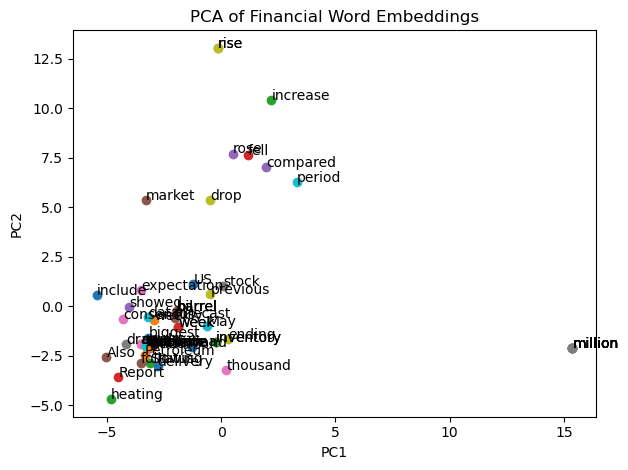

In [26]:
from sklearn.decomposition import PCA
# Reduce dimensionality (PCA → 2D)
pca = PCA(n_components=2)
coords = pca.fit_transform(embeddings)

# Plot in 2D space
plt.figure()
for (x, y), label in zip(coords, tokens):
    plt.scatter(x, y)
    plt.text(x + 1e-3, y + 1e-3, label)  # small offset so text isn’t on top of the dot
plt.title("PCA of Financial Word Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

- __Fine-tune the Pretrained Model__

In [27]:
# import numpy as np
# import pandas as pd
# from gensim.models import Word2Vec, KeyedVectors
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords

# # 1) Prepare your tokenized sentences as before
# stop_words = set(stopwords.words("english"))
# sentences = [
#     [t.lower() for t in word_tokenize(doc) if t.isalpha() and t.lower() not in stop_words]
#     for doc in df["Content"].astype(str)
# ]

# # 2) Load the pretrained vectors
# pretrained_path = 'bankfinvec_100d_v1.txt'
# pre_kv = KeyedVectors.load_word2vec_format(pretrained_path)

# # 3) Initialize an *empty* Word2Vec model with the same vector size
# w2v = Word2Vec(
#     vector_size=pre_kv.vector_size,
#     window=5,
#     min_count=1,    # keep all words
#     workers=4
# )

# # 4) Build the vocab from the pretrained KeyedVectors
# #    We use build_vocab_from_freq so we can inject the existing frequencies
# from collections import Counter
# freq = {word: pre_kv.get_vecattr(word, "count") for word in pre_kv.index_to_key}
# w2v.build_vocab_from_freq(freq, update=False)

# # 5) Copy over the pretrained weights and set lockf = 1.0 for all
# w2v.wv.vectors = pre_kv.vectors.copy()
# w2v.wv.vectors_lockf = np.ones(len(w2v.wv), dtype=np.float32)

# # 6) Now update the vocab with *your* sentences (so new words get added)
# w2v.build_vocab(sentences, update=True)

# # 7) And finally continue training
# w2v.train(
#     sentences,
#     total_examples=len(sentences),
#     epochs=5,            # fine-tune for a few epochs
#     start_alpha=0.01,    # small learning rate
#     end_alpha=0.001
# )

# # 8) Save your fine-tuned model
# w2v.wv.save("fine_tuned_financial_w2v.kv")


In [28]:
from gensim.models import Word2Vec
# Initialize an *empty* Word2Vec model with the same vector size
w2v_new = Word2Vec(
    vector_size=w2v.vector_size,
    window=5,
    min_count=1,    # keep all words
    workers=4
)

# Build the vocab from the pretrained KeyedVectors
# We use build_vocab_from_freq so we can inject the existing frequencies
from collections import Counter
freq = {word: w2v.get_vecattr(word, "count") for word in w2v.index_to_key}
w2v_new.build_vocab_from_freq(freq, update=False)

# Copy over the pretrained weights and set lockf = 1.0 for all
w2v_new.wv.vectors = w2v.vectors.copy()
w2v_new.wv.vectors_lockf = np.ones(len(w2v_new.wv), dtype=np.float32)

In [29]:
# Now update the vocab with cleaned content (so new words get added)
w2v_new.build_vocab(content_token_stop, update=True)

# Continue training
w2v_new.train(
    content_token_stop,
    total_examples=len(content_token_stop),
    epochs=10,            # fine-tune for a few epochs
    start_alpha=0.01,    # small learning rate
    end_alpha=0.001
)

# 8) Save the updated model
w2v_new.wv.save("fine_tuned_financial_w2v.kv")

In [30]:
# Embed a list of tokens from one of the articles
tokens = content_token_stop_lemma[400]
embeddings = np.vstack([get_static_embedding(tok, w2v_new.wv) for tok in tokens])

print("Shape:", embeddings.shape) 

Shape: (59, 100)


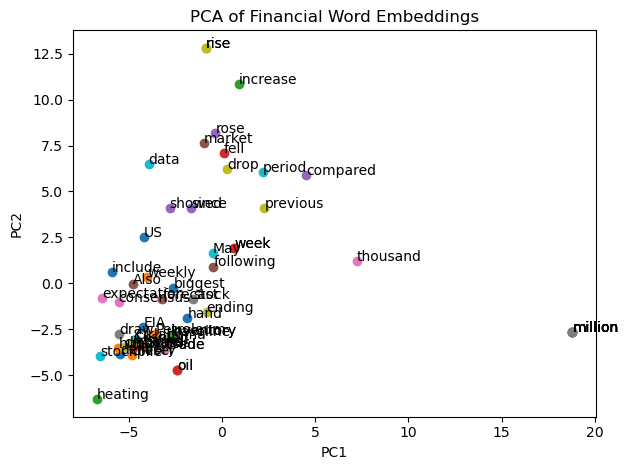

In [31]:
from sklearn.decomposition import PCA
# Reduce dimensionality (PCA → 2D)
pca = PCA(n_components=2)
coords = pca.fit_transform(embeddings)

# Plot in 2D space
plt.figure()
for (x, y), label in zip(coords, tokens):
    plt.scatter(x, y)
    plt.text(x + 1e-3, y + 1e-3, label)  # small offset so text isn’t on top of the dot
plt.title("PCA of Financial Word Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

### 5.2 Contextual Word Embeddings

In [32]:
from transformers import AutoTokenizer, AutoModel

# Initialize tokenizer & model, and add special tokens
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model     = AutoModel.from_pretrained("bert-base-uncased")

new_tokens = ["quantitative_easing", "GDP_growth", "AAPL", "TSX_Composite"]
tokenizer.add_special_tokens({"additional_special_tokens": new_tokens})
model.resize_token_embeddings(len(tokenizer))

# Tokenize with padding & truncation
inputs = tokenizer(
    df['Content'].tolist()[400:405],
    padding=True,        # pad to longest in this batch
    truncation=True,     # truncate to max_length
    max_length=128,      # choose suitable max length
    return_tensors="pt", # return PyTorch tensors
    return_attention_mask=True
)

In [37]:
outputs = model(**inputs)
cls_embeddings = outputs.last_hidden_state[:, 0, :]
print(cls_embeddings.shape)

torch.Size([5, 768])


## 6. Sentiment Analysis

### 6.1 Rule-based Sentiment Analysis

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to compute scores and a label
def rule_based_sentiment(text):
    scores = analyzer.polarity_scores(text)
    comp   = scores['compound']
    if comp >=  0.05:
        label = 'positive'
    elif comp <= -0.05:
        label = 'negative'
    else:
        label = 'neutral'
    return pd.Series({
        'neg':      scores['neg'],
        'neu':      scores['neu'],
        'pos':      scores['pos'],
        'compound': comp,
        'sentiment': label
    })

# Apply to your Content column
sentiment_df = df['Content'][400:405].apply(rule_based_sentiment)

# Concatenate back for inspection
df_with_sentiment = pd.concat([df[400:405], sentiment_df], axis=1)

print(df_with_sentiment[['Content','compound','sentiment']].head())

                                               Content  compound sentiment
400  US crude oil inventories rose by 5.04 million ...   -0.6124  negative
401  UnitedHealth decreased to a 6-week low of 478....   -0.2732  negative
402  Coca-Cola decreased to a 4-week low of 62.9820...   -0.2732  negative
403  Walmart decreased to a 4-week low of 149.38202...   -0.2732  negative
404  Building permits in the United States declined...    0.3400  positive


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jiancao/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### 6.2 Pretrained Transformer

In [56]:
from transformers import pipeline

# Initialize the Hugging Face sentiment-analysis pipeline
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis",
    tokenizer="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis",
    device=-1   # use -1 for CPU, or set to GPU index if available
)

# Run sentiment analysis
texts = df['Content'].tolist()[400:405]
results = sentiment_pipeline(texts)

# Convert the results into a DataFrame
sent_df = pd.DataFrame(results, index = range(400, 405))

# Concatenate with the original DataFrame
df_with_sentiment = pd.concat([df_with_sentiment, sent_df], axis=1)

df_with_sentiment = df_with_sentiment.rename(columns={
    'label': 'PT',
    'sentiment': 'RB'
})

print(df_with_sentiment[['Content', 'PT', 'RB']].head())

Device set to use cpu


                                               Content        PT        RB
400  US crude oil inventories rose by 5.04 million ...  positive  negative
401  UnitedHealth decreased to a 6-week low of 478....  negative  negative
402  Coca-Cola decreased to a 4-week low of 62.9820...  negative  negative
403  Walmart decreased to a 4-week low of 149.38202...  negative  negative
404  Building permits in the United States declined...  negative  positive


## 7. Topic Modeling

### 7.1 Classic LDA (Latent Dirichlet Allocation) Method

In [67]:
from gensim import corpora

# Create dictionary & corpus
dictionary = corpora.Dictionary(content_token_stop_lemma)
# filter out too rare or too common tokens
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in content_token_stop_lemma]

In [68]:
from gensim.models import LdaModel

# Train LDA
num_topics = 5
lda = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    per_word_topics=False
)

# Print the top terms for each topic
for topic_id in range(num_topics):
    terms = lda.show_topic(topic_id, topn=8)
    term_str = ", ".join([term for term, _ in terms])
    print(f"Topic {topic_id}: {term_str}")

Topic 0: week, million, previous, market, ended, thousand, oil, expectation
Topic 1: percent, billion, month, increased, USD, market, States, price
Topic 2: US, rate, dollar, Fed, investor, inflation, Federal, Reserve
Topic 3: point, Dow, P, Nasdaq, Jones, US, since, new
Topic 4: earnings, released, share, per, market, expectation, compared, USD


- Topic 0: Weekly Market Performance
- Topic 1: Price Movements
- Topic 2: US Monetary Policy
- Topic 3: Equity Induces
- Topic 4: Earnings Reports

### 7.2 Pretrained Model `BERTopic`

In [6]:
from sentence_transformers import SentenceTransformer

documents = df['Content'].tolist()[:400]

# Compute contextual embeddings
embedder   = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embedder.encode(documents, show_progress_bar=True)

AttributeError: module 'pyarrow.lib' has no attribute 'ArrayStatistics'

In [ ]:
from bertopic import BERTopic

# Fit BERTopic
topic_model = BERTopic(
    nr_topics=5,          # or set to "auto" to let it decide
    embedding_model=embedder
)
topics, probs = topic_model.fit_transform(documents, embeddings)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
# 5) Inspect the topic summary
topic_info = topic_model.get_topic_info()
print(topic_info.head(10))

# 6) See top terms for a specific topic
print("Topic 0 top terms:", topic_model.get_topic(0))

# 7) (Optional) Interactive visualizations
# topic_model.visualize_topics()
# topic_model.visualize_heatmap()
# topic_model.visualize_barchart(top_n_topics=5)

In [ ]:
# 1) Install required libraries (once):
#    pip install bertopic[all] sentence-transformers pandas

import pandas as pd
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

# 2) Load your cleaned data
df = pd.read_csv('Financial2.csv')
documents = df['Content'].astype(str).tolist()

# 3) Compute contextual embeddings
embedder   = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embedder.encode(documents, show_progress_bar=True)

# 4) Fit BERTopic
topic_model = BERTopic(
    nr_topics=10,          # or set to "auto" to let it decide
    embedding_model=embedder
)
topics, probs = topic_model.fit_transform(documents, embeddings)

# 5) Inspect the topic summary
topic_info = topic_model.get_topic_info()
print(topic_info.head(10))

# 6) See top terms for a specific topic
print("Topic 0 top terms:", topic_model.get_topic(0))

# 7) (Optional) Interactive visualizations
# topic_model.visualize_topics()
# topic_model.visualize_heatmap()
# topic_model.visualize_barchart(top_n_topics=5)


In [7]:
%pip install --upgrade pyarrow

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install --upgrade --force-reinstall sentence-transformers

  Using cached sentence_transformers-4.1.0-py3-none-any.whl.metadata (13 kB)
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached torch-2.7.0-cp312-none-macosx_11_0_arm64.whl.metadata (29 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached scipy-1.15.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached huggingface_hub-0.31.2-py3-none-any.whl.metadata (13 kB)
  Using cached pillow-11.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Using cached safetensors-0.5.3-cp38-abi3-macosx_11_0_arm

In [5]:
import pyarrow
import datasets   # should no longer error
from sentence_transformers import SentenceTransformer

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


AttributeError: module 'pyarrow' has no attribute '__version__'

In [10]:
%conda uninstall pyarrow -y

Channels:
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: | 

## Package Plan ##

  environment location: /opt/anaconda3/envs/pyenv01

  removed specs:
    - pyarrow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boto3-1.37.10              |  py312hca03da5_0         213 KB
    botocore-1.37.10           |  py312hca03da5_0         8.8 MB
    s3transfer-0.11.2          |  py312hca03da5_0         208 KB
    sacremoses-0.0.43          |     pyhd3eb1b0_0         284 KB
    transformers-2.1.1         |     pyhd3eb1b0_0         136 KB
    ------------------------------------------------------------
                                           Total:         9.6 MB

The following NEW packages will be INSTALLED:

  boto3              pkgs/main/osx-arm64::boto3-1.37.10-py312hca03da5_0 
  botocore           pkgs/main/osx-arm64::botocore-1.37.10-

In [2]:
%pip uninstall sentence-transformers bertopic -y

Found existing installation: sentence-transformers 4.1.0
Uninstalling sentence-transformers-4.1.0:
  Successfully uninstalled sentence-transformers-4.1.0
Found existing installation: bertopic 0.17.0
Uninstalling bertopic-0.17.0:
  Successfully uninstalled bertopic-0.17.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install pyarrow sentence-transformers bertopic

  Using cached sentence_transformers-4.1.0-py3-none-any.whl.metadata (13 kB)
  Using cached bertopic-0.17.0-py3-none-any.whl.metadata (23 kB)
Using cached sentence_transformers-4.1.0-py3-none-any.whl (345 kB)
Using cached bertopic-0.17.0-py3-none-any.whl (150 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 22.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires xxhash, which is not installed.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.
econml 0.15.1 requires numpy<2, but you have numpy 2.1.3 which is incompatible.
econml 0